Arbol de decision 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

In [2]:
df_wine = pd.read_csv('C:/Datos/wine.csv', header=None, delimiter=',')

In [3]:
generic_column_names = ['Class'] + [f'Feature_{i+1}' for i in range(13)]
df_wine.columns = generic_column_names

In [4]:
X = df_wine.drop('Class', axis=1)
y = df_wine['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [7]:
y_pred = clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 94.44%


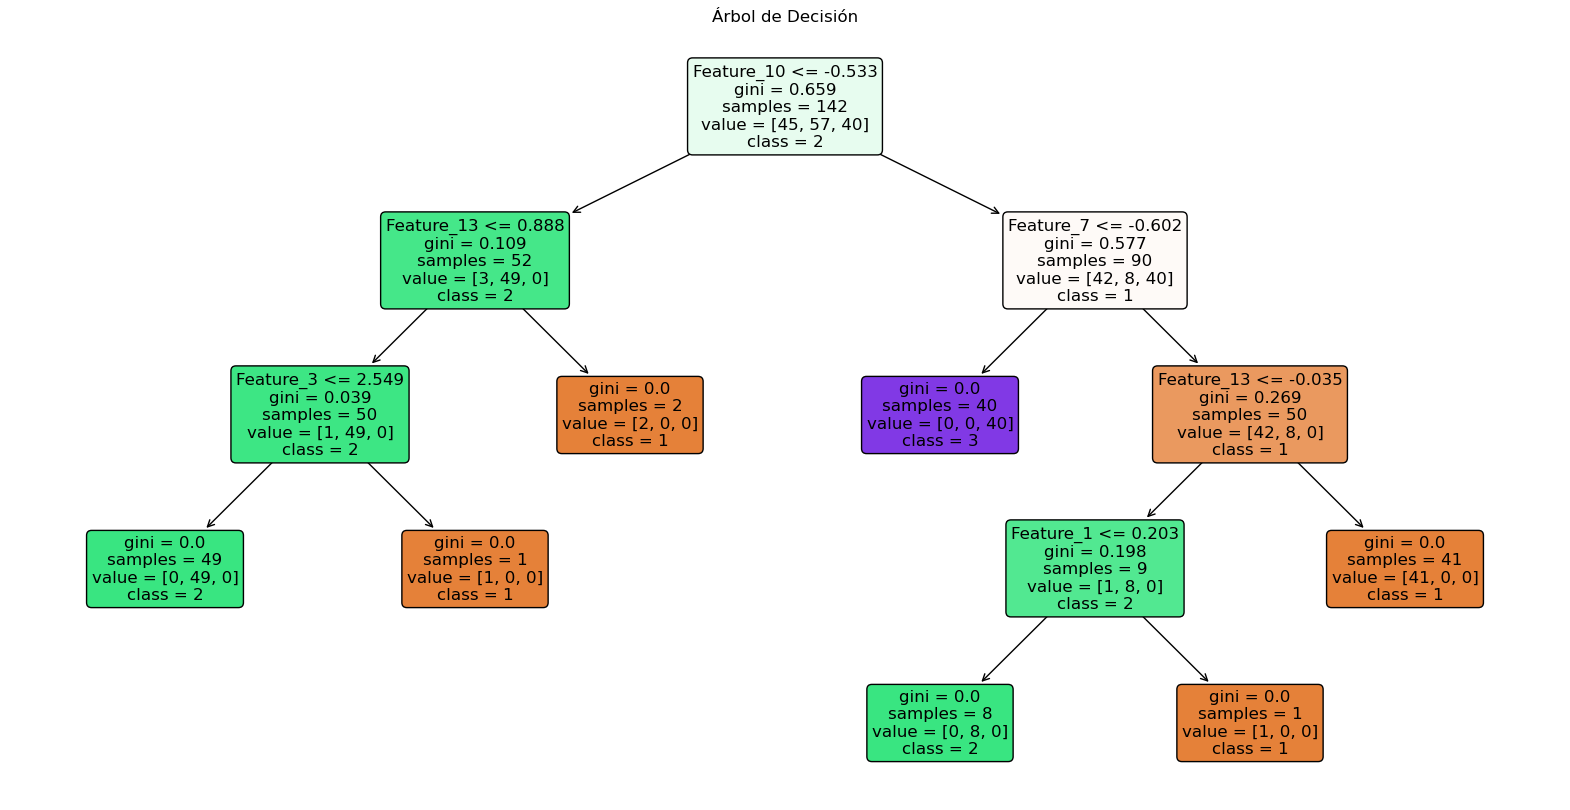

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=generic_column_names[1:], class_names=['1', '2', '3'], filled=True, rounded=True, fontsize=12)
plt.title('Árbol de Decisión')
plt.show()